## Características de la data

https://docs.w3cub.com/scikit_learn/datasets/#boston-dataset

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Se obtienen datos de la misma librería y se arma el dataframe
boston = datasets.load_boston() 
data_frame = pd.DataFrame(boston.data)
data_frame.columns = boston.feature_names
data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
y = pd.DataFrame(boston.target)
y.shape

(506, 1)

In [19]:
# Selecciona el número de habitaciones de la casa
X = pd.DataFrame(data_frame.RM)
X.shape

(506, 1)

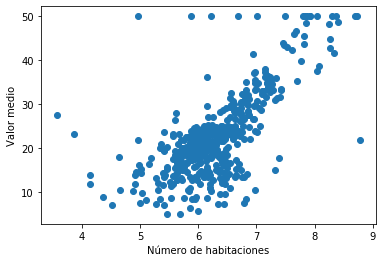

In [20]:
# Graficamos los datos correspondientes
plt.scatter(X, y)
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [22]:
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

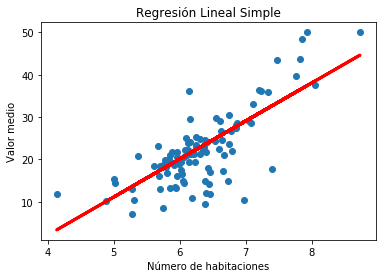

In [23]:
# Grafica los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

In [25]:
# Evaluación del modelo
print("Score modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, Y_pred))
#print(modelo.score(X_test, y_test))

Score modelo: 0.58
Mean squared error: 32.10
Coeficiente de determinación: 0.58


In [26]:
print("Reales:", y_test)
print("Prediciones", Y_pred)

Reales:         0
185  29.6
225  50.0
64   33.0
19   18.2
128  18.0
..    ...
191  30.5
312  19.4
242  22.2
406  11.9
31   14.5

[102 rows x 1 columns]
Prediciones [[21.48212192]
 [44.59765261]
 [30.02911635]
 [17.65349981]
 [23.98061241]
 [21.98541497]
 [24.94226162]
 [25.53542843]
 [23.73795326]
 [10.04119247]
 [36.76066087]
 [22.26402362]
 [37.44370143]
 [21.84161696]
 [23.65706688]
 [25.7691002 ]
 [22.3089605 ]
 [21.24845015]
 [17.48273967]
 [26.16454474]
 [30.94582869]
 [21.12262689]
 [22.16516249]
 [19.32515172]
 [25.10403439]
 [19.97224278]
 [35.96977179]
 [23.85478915]
 [23.20769808]
 [27.84518402]
 [31.21544997]
 [22.82124092]
 [26.64986304]
 [21.19452589]
 [13.5642438 ]
 [13.85183983]
 [18.75894704]
 [13.60918068]
 [28.80683324]
 [21.85959171]
 [27.02733282]
 [25.4365673 ]
 [23.45934461]
 [17.41982804]
 [11.29043771]
 [17.77932307]
 [20.23287668]
 [33.31849592]
 [18.14780548]
 [24.18732205]
 [25.81403708]
 [24.02554929]
 [22.28199837]
 [19.80148264]
 [21.33832391]
 [24.232258

In [27]:
print("Una predicción : ", modelo.predict([[5]]))

Una predicción :  [[11.11967757]]


## Agregando una nueva característica

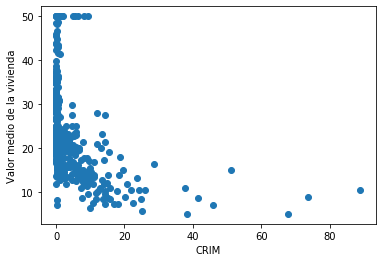

In [28]:
# Graficamos los datos correspondientes para ver si hay correlación positiva o negativa
plt.scatter(data_frame.CRIM, y)
plt.xlabel('CRIM')
plt.ylabel('Valor medio de la vivienda')
plt.show()

### Coeficiente de correlación de Pearson

El coeficiente de correlación de Pearson se utiliza para estudiar la relación (o correlación) entre dos variables aleatorias cuantitativas (escala mínima de intervalo); por ejemplo, la relación entre el peso y la altura.

Es una medida que nos da información acerca de la intensidad y la dirección de la relación. En otras palabras, se trata de un índice que mide el grado de covariación entre distintas variables relacionadas linealmente.

### Características de coeficiente de correlación de Pearson

+ Es una medida independiente de las escalas en las que se midan las variables.
+ No varía si se aplican transformaciones a las variables.
+ No tiene en consideración que las variables sean dependientes o independientes.
+ El coeficiente de correlación de Pearson no equivale a la pendiente de la recta de regresión.
+ Es sensible a outliers, por lo que se recomienda en caso de poder justificarlos, excluirlos del análisis.

### Interpretación de coeficiente de correlación de Pearson

El coeficiente de correlación de Pearson comprende valores entre el -1 y el +1. Así, dependiendo de su valor, tendrá un significado u otro.

Si el coeficiente de correlación de Pearson es igual a 1 o a -1, podemos considerar que la correlación que existe entre las variables estudiadas es perfecta.

Si el coeficiente es mayor que 0, la correlación es positiva (Si una aumenta la otra aumenta, si una disminuye la otra disminuye). En cambio, si es menor que 0 (negativo), la correlación es negativa (si una aumenta la otra disminuye, si una disminuye la otra aumenta). Finalmente, si el coeficiente es igual a 0, sólo podemos afirmar que no hay relación lineal entre las variables, pero puede haber algún otro tipo de relación.

In [29]:
# Vamos a revisar la correlación entre las variables
data_frame.corr(method ='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


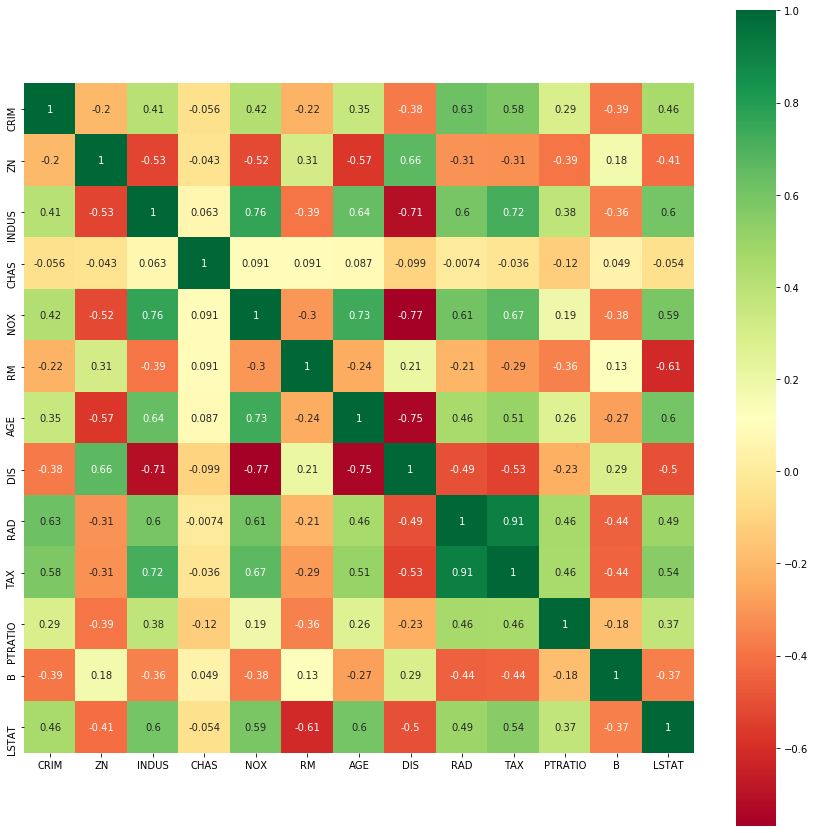

In [30]:
## Correlación de las variables
plt.figure(figsize=(15,15))
p=sns.heatmap(data_frame.corr(method="pearson"), annot=True,cmap='RdYlGn',square=True)

In [31]:
# Selecciona las características de CRIM y RM
X = data_frame[['CRIM','RM']]
X

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147
...,...,...
501,0.06263,6.593
502,0.04527,6.120
503,0.06076,6.976
504,0.10959,6.794


In [32]:
# Verificamos los shape
print("Shape of X", X.shape,"Shpae of y", y.shape)

Shape of X (506, 2) Shpae of y (506, 1)


In [33]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [34]:
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [39]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.64
Mean squared error: 27.10
Coeficiente de determinación: 0.64


In [40]:
# Muestra los coeficientes de la ecuación de regresión
print("Coeficientes:",modelo.coef_)
print("Término independiente:", modelo.intercept_)

Coeficientes: [[-0.27689106  8.11119485]]
Término independiente: [-27.29202399]


## Ahora vamos a comparar con otro par de características

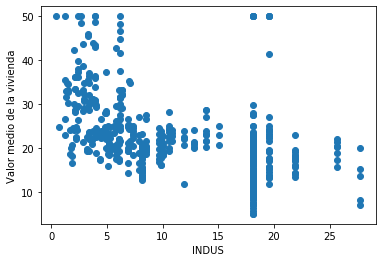

In [41]:
# Graficamos los datos correspondientes para ver si hay correlación positiva o negativa
plt.scatter(data_frame.INDUS, y)
plt.xlabel('INDUS')
plt.ylabel('Valor medio de la vivienda')
plt.show()

In [42]:
# Selecciona las características de INDUS y RM
X = data_frame[['INDUS','RM']]
X

,INDUS,RM
0,2.31,6.575
1,7.07,6.421
2,7.07,7.185
3,2.18,6.998
4,2.18,7.147
...,...,...
501,11.93,6.593
502,11.93,6.120
503,11.93,6.976
504,11.93,6.794


In [43]:
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [50]:
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [44]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.63
Mean squared error: 27.10
Coeficiente de determinación: 0.64


In [45]:
# Muestra los coeficientes de la ecuación de regresión
print("Coeficientes:",modelo.coef_)
print("Término independiente:", modelo.intercept_)

Coeficientes: [[-0.27689106  8.11119485]]
Término independiente: [-27.29202399]


### Ahora consideramos las tres características

In [46]:
# Selecciona las características de CRIM, INDUS y RM
X = data_frame[['CRIM','INDUS','RM']]
X

,CRIM,INDUS,RM
0,0.00632,2.31,6.575
1,0.02731,7.07,6.421
2,0.02729,7.07,7.185
3,0.03237,2.18,6.998
4,0.06905,2.18,7.147
...,...,...,...
501,0.06263,11.93,6.593
502,0.04527,11.93,6.120
503,0.06076,11.93,6.976
504,0.10959,11.93,6.794


In [47]:
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [48]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.67
Mean squared error: 24.81
Coeficiente de determinación: 0.67


In [49]:
# Muestra los coeficientes de la ecuación de regresión
print("Coeficientes:",modelo.coef_)
print("Término independiente:", modelo.intercept_)

Coeficientes: [[-0.20990912 -0.23576068  7.39296791]]
Término independiente: [-20.37986238]


## Análisis final de la predicción
Para finalizar se van a considerar cuatro caracterísiticas de las casas
<ui>
    <li> CRIM per capita crime rate by town </li>
    <li> INDUS proportion of non-retail business acres per town </li>
    <li> RM average number of rooms per dwelling </li>
    <li> RAD index of accessibility to radial highways </li>
</ui>

In [50]:
# Selecciona las características de CRIM, INDUS, RM, RAD
X = data_frame[['CRIM','INDUS','RM','RAD']]
X

,CRIM,INDUS,RM,RAD
0,0.00632,2.31,6.575,1.0
1,0.02731,7.07,6.421,2.0
2,0.02729,7.07,7.185,2.0
3,0.03237,2.18,6.998,3.0
4,0.06905,2.18,7.147,3.0
...,...,...,...,...
501,0.06263,11.93,6.593,1.0
502,0.04527,11.93,6.120,1.0
503,0.06076,11.93,6.976,1.0
504,0.10959,11.93,6.794,1.0


In [51]:
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [52]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.68
Mean squared error: 24.24
Coeficiente de determinación: 0.68


In [53]:
# Muestra los coeficientes de la ecuación de regresión
print("Coeficientes:",modelo.coef_)
print("Término independiente:", modelo.intercept_)

Coeficientes: [[-0.17804645 -0.20294515  7.45108653 -0.06104835]]
Término independiente: [-20.63687019]
